In [1]:
import sys
sys.path.append('D:\\python\python39\lib\site-packages')
import os
import json
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import missingno as msno
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
warnings.filterwarnings("ignore")

# task4

In [2]:
properties = pd.read_csv("DC_Properties.csv",index_col=[0])
properties

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,1938,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,1938,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,1920,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


show general information of properties

In [3]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   NUM_UNITS           106696 non-null  float64
 5   ROOMS               158957 non-null  int64  
 6   BEDRM               158957 non-null  int64  
 7   AYB                 158686 non-null  float64
 8   YR_RMDL             80928 non-null   float64
 9   EYB                 158957 non-null  int64  
 10  STORIES             106652 non-null  float64
 11  SALEDATE            132187 non-null  object 
 12  PRICE               98216 non-null   float64
 13  QUALIFIED           158957 non-null  object 
 14  SALE_NUM            158957 non-null  int64  
 15  GBA                 106696 non-nul

show outliers of some features, and deal with them
consider values over or under the values of 1.5 times difference between quatiles plus or minus quatiles as outliers

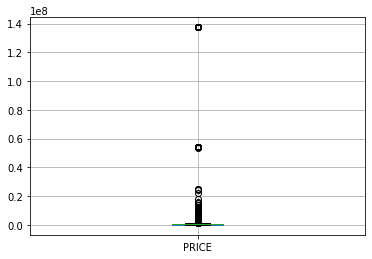

In [4]:
properties[["PRICE"]].boxplot()
plt.show()

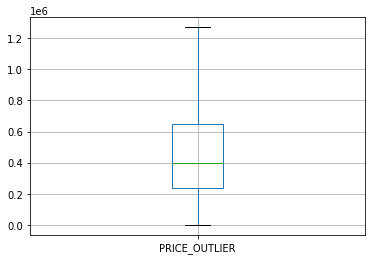

In [5]:
up = properties["PRICE"].quantile(0.75)
lo = properties["PRICE"].quantile(0.25)
dif=up-lo
up=up+1.5*dif
lo=lo-1.5*dif
def price_outlier(x):
    if x>up:
        return up
    elif x<lo:
        return lo
    else:
        return x
properties["PRICE_OUTLIER"]=properties["PRICE"].apply(price_outlier)
properties[["PRICE_OUTLIER"]].boxplot()
plt.show()

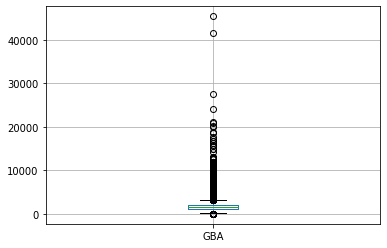

In [6]:
properties[["GBA"]].boxplot()
plt.show()

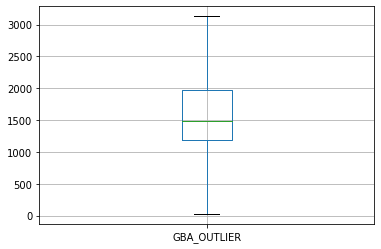

In [7]:
up = properties["GBA"].quantile(0.75)
lo = properties["GBA"].quantile(0.25)
dif=up-lo
up=up+1.5*dif
lo=lo-1.5*dif
def price_outlier(x):
    if x>up:
        return up
    elif x<lo:
        return lo
    else:
        return x
properties["GBA_OUTLIER"]=properties["GBA"].apply(price_outlier)
properties[["GBA_OUTLIER"]].boxplot()
plt.show()

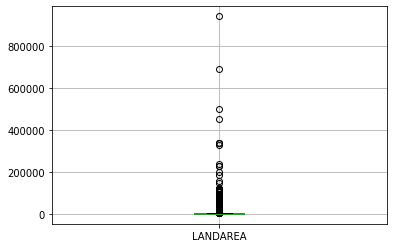

In [8]:
properties[["LANDAREA"]].boxplot()
plt.show()

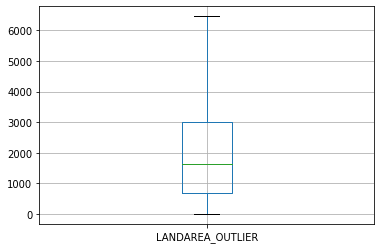

In [9]:
up = properties["LANDAREA"].quantile(0.75)
lo = properties["LANDAREA"].quantile(0.25)
dif=up-lo
up=up+1.5*dif
lo=lo-1.5*dif
def price_outlier(x):
    if x>up:
        return up
    elif x<lo:
        return lo
    else:
        return x
properties["LANDAREA_OUTLIER"]=properties["LANDAREA"].apply(price_outlier)
properties[["LANDAREA_OUTLIER"]].boxplot()
plt.show()

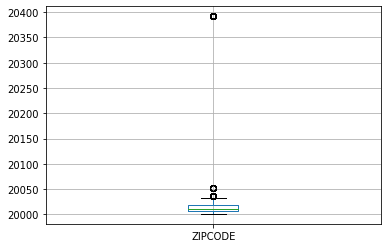

In [10]:
properties[["ZIPCODE"]].boxplot()
plt.show()

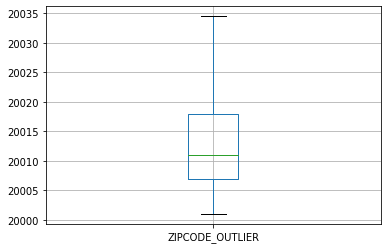

In [11]:
up = properties["ZIPCODE"].quantile(0.75)
lo = properties["ZIPCODE"].quantile(0.25)
dif=up-lo
up=up+1.5*dif
lo=lo-1.5*dif
def price_outlier(x):
    if x>up:
        return up
    elif x<lo:
        return lo
    else:
        return x
properties["ZIPCODE_OUTLIER"]=properties["ZIPCODE"].apply(price_outlier)
properties[["ZIPCODE_OUTLIER"]].boxplot()
plt.show()

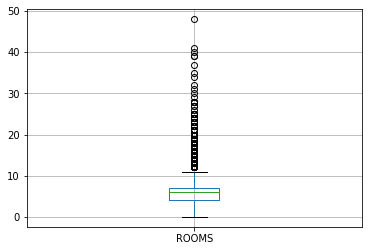

In [12]:
properties[["ROOMS"]].boxplot()
plt.show()

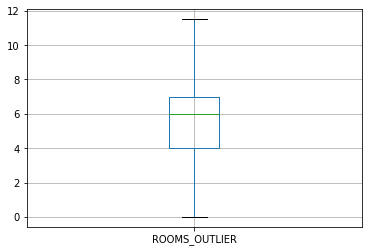

In [13]:
up = properties["ROOMS"].quantile(0.75)
lo = properties["ROOMS"].quantile(0.25)
dif=up-lo
up=up+1.5*dif
lo=lo-1.5*dif
def price_outlier(x):
    if x>up:
        return up
    elif x<lo:
        return lo
    else:
        return x
properties["ROOMS_OUTLIER"]=properties["ROOMS"].apply(price_outlier)
properties[["ROOMS_OUTLIER"]].boxplot()
plt.show()

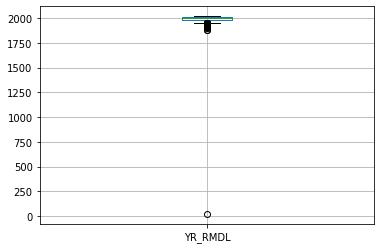

In [14]:
properties[["YR_RMDL"]].boxplot()
plt.show()

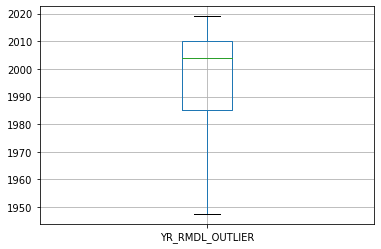

In [15]:
up = properties["YR_RMDL"].quantile(0.75)
lo = properties["YR_RMDL"].quantile(0.25)
dif=up-lo
up=up+1.5*dif
lo=lo-1.5*dif
def price_outlier(x):
    if x>up:
        return up
    elif x<lo:
        return lo
    else:
        return x
properties["YR_RMDL_OUTLIER"]=properties["YR_RMDL"].apply(price_outlier)
properties[["YR_RMDL_OUTLIER"]].boxplot()
plt.show()

create new dataframe properties_new to store features that may to be used in regression
fill the missed values and transfer object type values into integer type

In [16]:
properties_new=properties.drop(["CMPLX_NUM"], axis=1)
properties_new=properties_new.drop(["LIVING_GBA"],axis=1)
properties_new=properties_new.drop(["SALEDATE"],axis=1)
properties_new=properties_new.drop(["FIREPLACES"], axis=1)

properties_new["YR_RMDL"].fillna(1947, inplace=True)
properties_new["YR_RMDL_OUTLIER"].fillna(1947, inplace=True)

properties_new["ZIPCODE_OUTLIER"].fillna(properties_new["ZIPCODE_OUTLIER"].mean(),inplace=True)
properties_new["LATITUDE"].fillna(properties_new["LATITUDE"].mean(),inplace=True)
properties_new["LONGITUDE"].fillna(properties_new["LONGITUDE"].mean(),inplace=True)
properties_new["X"].fillna(properties_new["X"].mean(),inplace=True)
properties_new["Y"].fillna(properties_new["Y"].mean(),inplace=True)
properties_new["CENSUS_TRACT"].fillna(properties_new["CENSUS_TRACT"].mean(),inplace=True)

def discrete_AC(x):
    if x=='Y':
        return 1
    if x=='N':
        return -1
    if x=='0':
        return 0
    
def discrete_GRADE(x):
    if x=='Exceptional-A':
        return 1
    elif x=='Exceptional-B':
        return 2
    elif x=='Exceptional-C':
        return 3
    elif x=='Exceptional-D':
        return 4
    elif x=='Fair Quality':
        return 5
    elif x=='Avereage':
        return 6
    elif x=='Above Average':
        return 7
    elif x=='Good Quality':
        return 8
    elif x=='Very Good':
        return 9
    elif x=='Excellent':
        return 10
    elif x=='Superior':
        return 11
    else:
        return 6
    
def discrete_CNDTN(x):
    if x=='Poor':
        return 1
    elif x=='Fair':
        return 2
    elif x=='Good':
        return 3
    elif x=='Very Good':
        return 4
    elif x=='Excellent':
        return 5
    else:
        return 2

    
properties_new['GRADE_V']= properties['GRADE'].apply(discrete_GRADE)
properties_new['AC_V'] = properties['AC'].apply(discrete_AC)
properties_new['CNDTN_V'] = properties['CNDTN'].apply(discrete_CNDTN)

properties_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 53 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   NUM_UNITS           106696 non-null  float64
 5   ROOMS               158957 non-null  int64  
 6   BEDRM               158957 non-null  int64  
 7   AYB                 158686 non-null  float64
 8   YR_RMDL             158957 non-null  float64
 9   EYB                 158957 non-null  int64  
 10  STORIES             106652 non-null  float64
 11  PRICE               98216 non-null   float64
 12  QUALIFIED           158957 non-null  object 
 13  SALE_NUM            158957 non-null  int64  
 14  GBA                 106696 non-null  float64
 15  BLDG_NUM            158957 non-nul

display correlation between features selected in properties_new

In [17]:
corrMatrix=properties_new.corr()
corrMatrix

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,Y,PRICE_OUTLIER,GBA_OUTLIER,LANDAREA_OUTLIER,ZIPCODE_OUTLIER,ROOMS_OUTLIER,YR_RMDL_OUTLIER,GRADE_V,AC_V,CNDTN_V
BATHRM,1.000000,0.248759,0.403431,0.677751,0.655563,-0.039087,0.177417,0.269444,0.042349,-0.006536,...,0.129690,0.521705,0.693548,0.408990,-0.086604,0.655036,0.180057,0.350494,0.133513,0.436109
HF_BATHRM,0.248759,1.000000,-0.151393,0.353825,0.375568,-0.009372,0.038846,0.235645,0.033270,-0.013113,...,0.126109,0.316287,0.252602,0.349420,-0.009391,0.388276,0.039816,0.297197,0.121314,0.362503
NUM_UNITS,0.403431,-0.151393,1.000000,0.524724,0.330551,-0.104280,0.045385,-0.069551,0.019268,-0.000469,...,-0.116872,0.003934,0.354935,-0.059979,-0.100817,0.442279,0.046424,-0.004338,-0.090888,-0.056158
ROOMS,0.677751,0.353825,0.524724,1.000000,0.841309,-0.219367,0.009082,0.158847,0.039352,-0.038241,...,0.119610,0.335612,0.692509,0.576120,-0.050811,0.969619,0.009977,0.388408,-0.165388,0.363536
BEDRM,0.655563,0.375568,0.330551,0.841309,1.000000,-0.242955,0.034834,0.168913,0.040859,-0.043331,...,0.144630,0.369623,0.653769,0.581545,-0.068618,0.849709,0.036230,0.404105,-0.144600,0.373965
AYB,-0.039087,-0.009372,-0.104280,-0.219367,-0.242955,1.000000,-0.300029,0.660668,-0.011098,0.056041,...,-0.122575,-0.056893,-0.022830,-0.109334,0.257436,-0.240916,-0.305762,-0.161388,0.274723,0.017594
YR_RMDL,0.177417,0.038846,0.045385,0.009082,0.034834,-0.300029,1.000000,-0.128281,0.015851,0.060862,...,0.033434,0.193318,0.152182,-0.047793,-0.140304,0.008794,0.984948,0.042623,0.279374,0.241744
EYB,0.269444,0.235645,-0.069551,0.158847,0.168913,0.660668,-0.128281,1.000000,0.040214,0.049627,...,-0.082202,0.240964,0.299226,0.112064,0.039923,0.171077,-0.130467,0.188069,0.234621,0.363853
STORIES,0.042349,0.033270,0.019268,0.039352,0.040859,-0.011098,0.015851,0.040214,1.000000,0.042337,...,-0.003587,0.041493,0.061558,-0.031338,-0.027249,0.042877,0.016210,0.034808,0.011967,0.034276
PRICE,-0.006536,-0.013113,-0.000469,-0.038241,-0.043331,0.056041,0.060862,0.049627,0.042337,1.000000,...,0.044578,0.200547,0.475272,-0.024632,0.007717,-0.043977,0.062260,-0.015916,0.039829,-0.013148


display correlation between PRICE_OUTLIER and other features, just to prepare before selecting features

In [18]:
corrMatrix["PRICE_OUTLIER"].sort_values(ascending=False)

PRICE_OUTLIER       1.000000
BATHRM              0.521705
GBA_OUTLIER         0.519047
GBA                 0.508968
GRADE_V             0.396466
BEDRM               0.369623
CNDTN_V             0.362584
ROOMS_OUTLIER       0.356765
ROOMS               0.335612
HF_BATHRM           0.316287
LANDAREA            0.241556
EYB                 0.240964
SALE_NUM            0.233897
LANDAREA_OUTLIER    0.225177
LATITUDE            0.217636
Y                   0.217537
AC_V                0.215735
PRICE               0.200547
YR_RMDL_OUTLIER     0.197658
YR_RMDL             0.193318
KITCHENS            0.044597
STORIES             0.041493
BLDG_NUM            0.022988
NUM_UNITS           0.003934
USECODE            -0.026169
AYB                -0.056893
ZIPCODE            -0.110564
ZIPCODE_OUTLIER    -0.186485
CENSUS_TRACT       -0.339541
X                  -0.404282
LONGITUDE          -0.404566
Name: PRICE_OUTLIER, dtype: float64

drop features not used in regression

In [19]:
properties_new.drop(["GBA"], axis=1, inplace=True)
properties_new.drop(["ROOMS"], axis=1, inplace=True)
properties_new.drop(["PRICE"], axis=1, inplace=True)
properties_new.drop(["YR_RMDL"], axis=1, inplace=True)
properties_new.drop(["STORIES"], axis=1, inplace=True)
properties_new.drop(["KITCHENS"], axis=1, inplace=True)
properties_new.drop(["BLDG_NUM"], axis=1, inplace=True)
properties_new.drop(["NUM_UNITS"], axis=1, inplace=True)
properties_new.drop(["USECODE"], axis=1, inplace=True)
properties_new.drop(["AYB"], axis=1, inplace=True)
properties_new.drop(["ZIPCODE"], axis=1, inplace=True)
properties_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   BEDRM               158957 non-null  int64  
 5   EYB                 158957 non-null  int64  
 6   QUALIFIED           158957 non-null  object 
 7   SALE_NUM            158957 non-null  int64  
 8   STYLE               106696 non-null  object 
 9   STRUCT              106696 non-null  object 
 10  GRADE               106696 non-null  object 
 11  CNDTN               106696 non-null  object 
 12  EXTWALL             106696 non-null  object 
 13  ROOF                106696 non-null  object 
 14  INTWALL             106696 non-null  object 
 15  LANDAREA            158957 non-nul

transfer QUADRANT into integers

In [20]:
properties_temp=pd.DataFrame()
properties_temp["QUADRANT"]=properties["QUADRANT"]
properties_temp=pd.get_dummies(properties_temp, prefix = properties_temp.columns).astype(int)
properties_temp.value_counts()

QUADRANT_NE  QUADRANT_NW  QUADRANT_SE  QUADRANT_SW
0            1            0            0              89736
1            0            0            0              37675
0            0            1            0              27224
                          0            1               4085
                                       0                237
dtype: int64

fill missing data of QUADRANT
QUADRANT_NW has most 1, so fill missing data with 0100

In [21]:
properties_new["QUADRANT_NE"] = properties_temp["QUADRANT_NE"]
properties_new["QUADRANT_NW"] = properties_temp["QUADRANT_NW"]
properties_new["QUADRANT_SE"] = properties_temp["QUADRANT_SE"]
properties_new["QUADRANT_SW"] = properties_temp["QUADRANT_SW"]

properties_new["QUADRANT_NE"].fillna(0, inplace=True)
properties_new["QUADRANT_NW"].fillna(1, inplace=True)
properties_new["QUADRANT_SE"].fillna(0, inplace=True)
properties_new["QUADRANT_SW"].fillna(0, inplace=True)

properties_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   BEDRM               158957 non-null  int64  
 5   EYB                 158957 non-null  int64  
 6   QUALIFIED           158957 non-null  object 
 7   SALE_NUM            158957 non-null  int64  
 8   STYLE               106696 non-null  object 
 9   STRUCT              106696 non-null  object 
 10  GRADE               106696 non-null  object 
 11  CNDTN               106696 non-null  object 
 12  EXTWALL             106696 non-null  object 
 13  ROOF                106696 non-null  object 
 14  INTWALL             106696 non-null  object 
 15  LANDAREA            158957 non-nul

select only features after preprocess

In [22]:
properties_new.drop(['HEAT','AC','QUALIFIED','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','GIS_LAST_MOD_DTTM','SOURCE',
                     'FULLADDRESS','CITY','STATE','NATIONALGRID','ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','CENSUS_BLOCK','WARD','SQUARE',
                     'QUADRANT'], axis=1, inplace=True)

In [23]:
properties_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BATHRM            158957 non-null  int64  
 1   HF_BATHRM         158957 non-null  int64  
 2   BEDRM             158957 non-null  int64  
 3   EYB               158957 non-null  int64  
 4   SALE_NUM          158957 non-null  int64  
 5   LANDAREA          158957 non-null  int64  
 6   LATITUDE          158957 non-null  float64
 7   LONGITUDE         158957 non-null  float64
 8   CENSUS_TRACT      158957 non-null  float64
 9   X                 158957 non-null  float64
 10  Y                 158957 non-null  float64
 11  PRICE_OUTLIER     98216 non-null   float64
 12  GBA_OUTLIER       106696 non-null  float64
 13  LANDAREA_OUTLIER  158957 non-null  float64
 14  ZIPCODE_OUTLIER   158957 non-null  float64
 15  ROOMS_OUTLIER     158957 non-null  float64
 16  YR_RMDL_OUTLIER   15

drop rows if with missing data features

In [24]:
properties_new.dropna(inplace=True)
properties_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BATHRM            57900 non-null  int64  
 1   HF_BATHRM         57900 non-null  int64  
 2   BEDRM             57900 non-null  int64  
 3   EYB               57900 non-null  int64  
 4   SALE_NUM          57900 non-null  int64  
 5   LANDAREA          57900 non-null  int64  
 6   LATITUDE          57900 non-null  float64
 7   LONGITUDE         57900 non-null  float64
 8   CENSUS_TRACT      57900 non-null  float64
 9   X                 57900 non-null  float64
 10  Y                 57900 non-null  float64
 11  PRICE_OUTLIER     57900 non-null  float64
 12  GBA_OUTLIER       57900 non-null  float64
 13  LANDAREA_OUTLIER  57900 non-null  float64
 14  ZIPCODE_OUTLIER   57900 non-null  float64
 15  ROOMS_OUTLIER     57900 non-null  float64
 16  YR_RMDL_OUTLIER   57900 non-null  float

display correlation between PRICE_OUTLIER and other features

In [25]:
corrMatrix=properties_new.corr()
corrMatrix["PRICE_OUTLIER"].sort_values()

LONGITUDE          -0.573791
X                  -0.573364
CENSUS_TRACT       -0.478770
ZIPCODE_OUTLIER    -0.253607
QUADRANT_NE        -0.246451
QUADRANT_SE        -0.236096
QUADRANT_SW        -0.062208
LANDAREA_OUTLIER    0.194777
LANDAREA            0.227070
Y                   0.254135
LATITUDE            0.254140
SALE_NUM            0.277428
HF_BATHRM           0.286911
YR_RMDL_OUTLIER     0.299789
AC_V                0.317515
EYB                 0.344025
ROOMS_OUTLIER       0.362077
BEDRM               0.365048
CNDTN_V             0.395281
QUADRANT_NW         0.432567
GRADE_V             0.438569
BATHRM              0.517514
GBA_OUTLIER         0.519047
PRICE_OUTLIER       1.000000
Name: PRICE_OUTLIER, dtype: float64

divide into train set and test set, by ratio of 8:2

In [26]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(properties_new,properties_new["PRICE_OUTLIER"],test_size=0.2,random_state=1234)

x_train.drop(["PRICE_OUTLIER"],axis=1, inplace=True)
x_test.drop(["PRICE_OUTLIER"],axis=1, inplace=True)
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46320 entries, 40565 to 48491
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BATHRM            46320 non-null  int64  
 1   HF_BATHRM         46320 non-null  int64  
 2   BEDRM             46320 non-null  int64  
 3   EYB               46320 non-null  int64  
 4   SALE_NUM          46320 non-null  int64  
 5   LANDAREA          46320 non-null  int64  
 6   LATITUDE          46320 non-null  float64
 7   LONGITUDE         46320 non-null  float64
 8   CENSUS_TRACT      46320 non-null  float64
 9   X                 46320 non-null  float64
 10  Y                 46320 non-null  float64
 11  GBA_OUTLIER       46320 non-null  float64
 12  LANDAREA_OUTLIER  46320 non-null  float64
 13  ZIPCODE_OUTLIER   46320 non-null  float64
 14  ROOMS_OUTLIER     46320 non-null  float64
 15  YR_RMDL_OUTLIER   46320 non-null  float64
 16  GRADE_V           46320 non-null  in

using linear regression model of sklearn package

In [27]:
from sklearn import linear_model

properties_train_X=properties_new.drop(["PRICE_OUTLIER"], axis=1)
properties_train_Y=properties_new["PRICE_OUTLIER"]

regr = linear_model.LinearRegression()
regr.fit(properties_train_X, properties_train_Y)

print(regr.intercept_)
print(regr.coef_)
print(regr.score(properties_train_X, properties_train_Y))

-66824789.4460919
[ 3.98627067e+04  3.47997852e+04  3.88420208e+03  1.33099634e+03
  5.85840307e+04  4.26388980e+00 -1.41621947e+06 -2.45191398e+06
 -9.80733859e+00 -5.44745493e+05  6.58065525e+05  9.67161343e+01
  3.75271135e+00 -6.95857123e+03 -6.55757699e+03  1.02722144e+03
  2.50903291e+04  2.09752529e+04  6.53633427e+04  3.23522344e+04
 -3.32648336e+04  3.80028359e+03 -3.74215118e+04]
0.6532255397530919


In [28]:
from sklearn import linear_model

properties_train_X=properties_new.drop(["PRICE_OUTLIER"], axis=1)
properties_train_Y=properties_new["PRICE_OUTLIER"]

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print(regr.intercept_)
print(regr.coef_)
print(regr.score(x_test, y_test))

-67188593.2432264
[ 4.04371020e+04  3.56243929e+04  5.08135570e+03  1.34638158e+03
  5.78198892e+04  4.34098941e+00 -1.79680084e+06 -3.22577474e+06
 -9.56895349e+00  2.00183874e+05  1.02479591e+06  9.43300566e+01
  3.89112427e+00 -7.02509765e+03 -6.98858626e+03  1.02725782e+03
  2.53024645e+04  1.96701701e+04  6.64054123e+04  5.52214402e+03
 -6.15466329e+04 -2.35085361e+04 -6.55485150e+04]
0.6552550279028013


Conclusion: we can see that the variance score for linear regression is about 0.66.

for more details on correlation, we use lasso regression.

In [29]:
from sklearn import model_selection
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error

Lambdas=np.logspace(-5,2,200)

Lambdas=np.logspace(-5,2,200)
lasso_cv=LassoCV(alphas=Lambdas,normalize=True,cv=10,max_iter=10000)
lasso_cv.fit(x_train,y_train)

lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
lasso.fit(x_train,y_train)
print(pd.Series(index=['Intercept']+x_train.columns.tolist(),data=[lasso.intercept_]+lasso.coef_.tolist()))

Intercept          -6.719373e+07
BATHRM              4.043402e+04
HF_BATHRM           3.562490e+04
BEDRM               5.069428e+03
EYB                 1.346498e+03
SALE_NUM            5.781757e+04
LANDAREA            4.338672e+00
LATITUDE           -1.583752e+06
LONGITUDE          -3.015875e+06
CENSUS_TRACT       -9.554477e+00
X                  -9.591567e+03
Y                   8.115465e+05
GBA_OUTLIER         9.432834e+01
LANDAREA_OUTLIER    3.893630e+00
ZIPCODE_OUTLIER    -7.024474e+03
ROOMS_OUTLIER      -6.978377e+03
YR_RMDL_OUTLIER     1.027004e+03
GRADE_V             2.530271e+04
AC_V                1.966533e+04
CNDTN_V             6.641126e+04
QUADRANT_NE         1.568715e+04
QUADRANT_NW        -5.125978e+04
QUADRANT_SE        -1.333779e+04
QUADRANT_SW        -5.536840e+04
dtype: float64


In [30]:
lasso_score=lasso.score(x_test, y_test)
lasso_score

0.6552703233436432

Conclusion: <p>there is a slight improvement on variance score comparing with linear regression.<p>
            after normalize data and using lasso regression, we find that Latitude and Longitude have great influence on price.<p>
         Quadrant has 4 values, while NE, NW, SE have same level influence on price, SW has almost no influence.<p>
         sale_num has positive influence on price, which represents expensive houses are sold for more times.<p>
         comparing with bedroom and rooms numbers, bathroom number has greater influence on price.<p>
         grade and AC values also have great influence on price.<p>
         Y has no attribute in lasso regression, and is considered as 0.<p>

In [31]:
crime=pd.read_csv('DC_Crime.csv')
crime

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 21,8702.0,property,-77.003574,2017-04-29T08:00:23.000,theft f/auto,day,138139.0,5.0,5.0,...,150 - 299 block of q street ne,2017-04-29T01:30:14.000,17070672,theft f/auto,17070672-01,5E,2017-04-29T13:49:31.000Z,others,"38.911121322949178,-77.003576581965632",38.911114
1,cluster 16,1600.0,property,-77.026557,2017-04-29T08:30:37.000,theft f/auto,day,146051.0,4.0,4.0,...,7600 - 7699 block of georgia avenue nw,2017-04-29T02:30:10.000,17070675,theft f/auto,17070675-01,4A,2017-04-29T14:38:59.000Z,others,"38.982391883146363,-77.026559339798794",38.982384
2,cluster 8,4702.0,property,-77.020913,2017-04-29T11:10:57.000,theft/other,day,137185.0,1.0,6.0,...,600 - 699 block of k street nw,2017-04-29T10:43:33.000,17070714,theft/other,17070714-01,6E,2017-04-29T15:19:02.000Z,others,"38.902525540064957,-77.020915170313728",38.902518
3,cluster 31,7808.0,property,-76.919601,2017-04-28T09:30:33.000,theft/other,day,135903.0,6.0,7.0,...,5715 5739 block of blaine street ne,2017-04-28T09:15:27.000,17070736,theft/other,17070736-01,7C,2017-04-29T16:11:44.000Z,others,"38.890951021927407,-76.919603310082607",38.890943
4,cluster 39,10900.0,property,-77.003927,2017-04-29T13:42:11.000,theft/other,day,128340.0,7.0,8.0,...,4610 - 4659 block of south capitol street,2017-04-29T13:03:40.000,17070780,theft/other,17070780-01,8D,2017-04-29T18:17:15.000Z,others,"38.822847890448664,-77.003929146312586",38.822840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449198,cluster 22,11100.0,property,-76.977167,2021-03-17T20:20:07.000,theft/other,evening,139268.0,5.0,5.0,...,1815 - 1999 block of bryant street ne,2021-03-17T20:15:08.000,21034375,theft/other,21034375-01,5C,2021-03-17T21:07:30.000,others,"38.9212817635688,-76.9771673661107",38.921282
449199,cluster 6,5201.0,property,-77.035546,2021-03-17T17:20:33.000,motor vehicle theft,evening,137976.0,2.0,2.0,...,1500 - 1599 block of p street nw,2021-03-16T21:00:41.000,21034386,motor vehicle theft,21034386-01,2B,2021-03-17T21:38:51.000,others,"38.9096398205834,-77.0355462229667",38.909640
449200,cluster 23,8802.0,property,-76.982015,2021-03-17T23:09:20.000,theft/other,midnight,137150.0,5.0,5.0,...,900 - 999 block of bladensburg road ne,2021-03-17T22:21:45.000,21034407,theft/other,21034407-01,5D,2021-03-18T01:12:46.000,others,"38.9022029472732,-76.9820154636605",38.902203
449201,cluster 23,8802.0,property,-76.990857,2021-03-17T22:40:24.000,motor vehicle theft,midnight,137569.0,5.0,5.0,...,1300 - 1399 block of west virginia avenue ne,2021-03-17T22:38:11.000,21034425,motor vehicle theft,21034425-01,5D,2021-03-18T00:57:07.000,others,"38.905978473251,-76.9908573768314",38.905978


In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449203 entries, 0 to 449202
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NEIGHBORHOOD_CLUSTER  443701 non-null  object 
 1   CENSUS_TRACT          448011 non-null  float64
 2   offensegroup          449203 non-null  object 
 3   LONGITUDE             449203 non-null  float64
 4   END_DATE              422407 non-null  object 
 5   offense-text          449203 non-null  object 
 6   SHIFT                 449203 non-null  object 
 7   YBLOCK                449203 non-null  float64
 8   DISTRICT              448991 non-null  float64
 9   WARD                  449192 non-null  float64
 10  YEAR                  449203 non-null  int64  
 11  offensekey            449203 non-null  object 
 12  BID                   74761 non-null   object 
 13  sector                448960 non-null  object 
 14  PSA                   448960 non-null  float64
 15  

In [33]:
crime["YEAR"].value_counts()

2014    38440
2015    37328
2016    37228
2013    35896
2012    35318
2008    34309
2019    33909
2018    33760
2011    33293
2017    33113
2010    31677
2009    31315
2020    27871
2021     5746
Name: YEAR, dtype: int64

In [34]:
del crime['BID']
crime['START_DATE']=crime['START_DATE'].str[0:10].fillna(method='pad')
crime['END_DATE']=crime['END_DATE'].str[0:10].fillna(method='pad')
crime_filtered=crime.dropna()
crime_filtered.drop_duplicates(keep='first',inplace=True)
crime_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442193 entries, 0 to 449202
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NEIGHBORHOOD_CLUSTER  442193 non-null  object 
 1   CENSUS_TRACT          442193 non-null  float64
 2   offensegroup          442193 non-null  object 
 3   LONGITUDE             442193 non-null  float64
 4   END_DATE              442193 non-null  object 
 5   offense-text          442193 non-null  object 
 6   SHIFT                 442193 non-null  object 
 7   YBLOCK                442193 non-null  float64
 8   DISTRICT              442193 non-null  float64
 9   WARD                  442193 non-null  float64
 10  YEAR                  442193 non-null  int64  
 11  offensekey            442193 non-null  object 
 12  sector                442193 non-null  object 
 13  PSA                   442193 non-null  float64
 14  ucr-rank              442193 non-null  int64  
 15  

divide crime data by years, while only take the data from 2008 to 2021

In [35]:
crime_filtered_08=crime_filtered[crime_filtered.YEAR==2008]
crime_filtered_09=crime_filtered[crime_filtered.YEAR==2009]
crime_filtered_10=crime_filtered[crime_filtered.YEAR==2010]
crime_filtered_11=crime_filtered[crime_filtered.YEAR==2011]
crime_filtered_12=crime_filtered[crime_filtered.YEAR==2012]
crime_filtered_13=crime_filtered[crime_filtered.YEAR==2013]
crime_filtered_14=crime_filtered[crime_filtered.YEAR==2014]
crime_filtered_15=crime_filtered[crime_filtered.YEAR==2015]
crime_filtered_16=crime_filtered[crime_filtered.YEAR==2016]
crime_filtered_17=crime_filtered[crime_filtered.YEAR==2017]
crime_filtered_18=crime_filtered[crime_filtered.YEAR==2018]
crime_filtered_19=crime_filtered[crime_filtered.YEAR==2019]
crime_filtered_20=crime_filtered[crime_filtered.YEAR==2020]
crime_filtered_21=crime_filtered[crime_filtered.YEAR==2021]

create data set for model training.

In [36]:
crime_train_08 = pd.DataFrame()
crime_train_08["LONGITUDE"] = crime_filtered_08["LONGITUDE"]
crime_train_08["LATITUDE"] = crime_filtered_08["LATITUDE"]

crime_train_09 = pd.DataFrame()
crime_train_09["LONGITUDE"] = crime_filtered_09["LONGITUDE"]
crime_train_09["LATITUDE"] = crime_filtered_09["LATITUDE"]

crime_train_10 = pd.DataFrame()
crime_train_10["LONGITUDE"] = crime_filtered_10["LONGITUDE"]
crime_train_10["LATITUDE"] = crime_filtered_10["LATITUDE"]

crime_train_11 = pd.DataFrame()
crime_train_11["LONGITUDE"] = crime_filtered_11["LONGITUDE"]
crime_train_11["LATITUDE"] = crime_filtered_11["LATITUDE"]

crime_train_12 = pd.DataFrame()
crime_train_12["LONGITUDE"] = crime_filtered_12["LONGITUDE"]
crime_train_12["LATITUDE"] = crime_filtered_12["LATITUDE"]

crime_train_13 = pd.DataFrame()
crime_train_13["LONGITUDE"] = crime_filtered_13["LONGITUDE"]
crime_train_13["LATITUDE"] = crime_filtered_13["LATITUDE"]

crime_train_14 = pd.DataFrame()
crime_train_14["LONGITUDE"] = crime_filtered_14["LONGITUDE"]
crime_train_14["LATITUDE"] = crime_filtered_14["LATITUDE"]

crime_train_15 = pd.DataFrame()
crime_train_15["LONGITUDE"] = crime_filtered_15["LONGITUDE"]
crime_train_15["LATITUDE"] = crime_filtered_15["LATITUDE"]

crime_train_16 = pd.DataFrame()
crime_train_16["LONGITUDE"] = crime_filtered_16["LONGITUDE"]
crime_train_16["LATITUDE"] = crime_filtered_16["LATITUDE"]

crime_train_17 = pd.DataFrame()
crime_train_17["LONGITUDE"] = crime_filtered_17["LONGITUDE"]
crime_train_17["LATITUDE"] = crime_filtered_17["LATITUDE"]

crime_train_18 = pd.DataFrame()
crime_train_18["LONGITUDE"] = crime_filtered_18["LONGITUDE"]
crime_train_18["LATITUDE"] = crime_filtered_18["LATITUDE"]

crime_train_19 = pd.DataFrame()
crime_train_19["LONGITUDE"] = crime_filtered_19["LONGITUDE"]
crime_train_19["LATITUDE"] = crime_filtered_19["LATITUDE"]

crime_train_20 = pd.DataFrame()
crime_train_20["LONGITUDE"] = crime_filtered_20["LONGITUDE"]
crime_train_20["LATITUDE"] = crime_filtered_20["LATITUDE"]

crime_train_21 = pd.DataFrame()
crime_train_21["LONGITUDE"] = crime_filtered_21["LONGITUDE"]
crime_train_21["LATITUDE"] = crime_filtered_21["LATITUDE"]

crime_train_08 = pd.DataFrame()
crime_train_08["LONGITUDE"] = crime_filtered_08["LONGITUDE"]
crime_train_08["LATITUDE"] = crime_filtered_08["LATITUDE"]

the cluster result is not fine enough<p>this model creates too many noise points, and can not divide propertly.<p>so we try Gaussian Mixture clustering

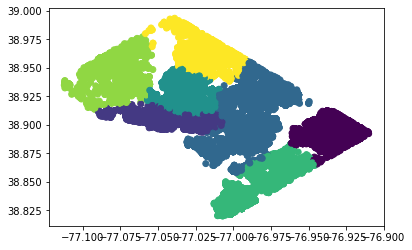

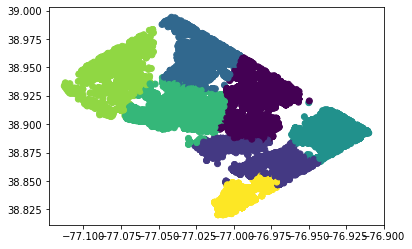

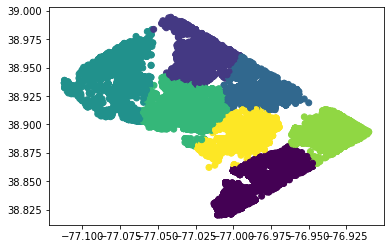

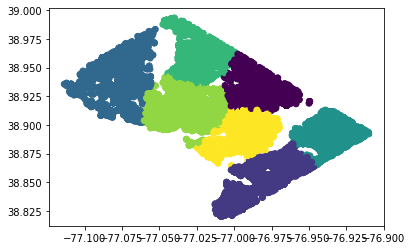

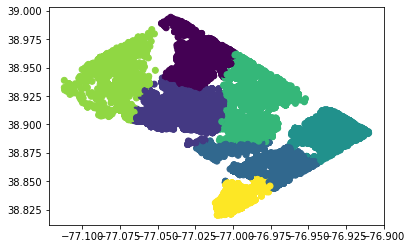

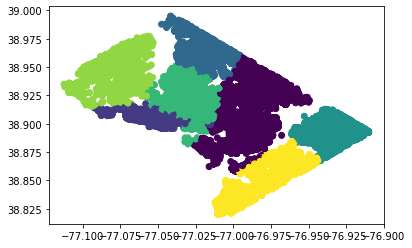

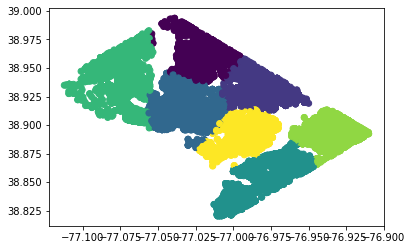

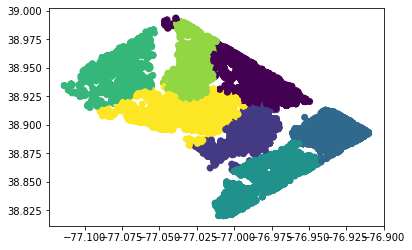

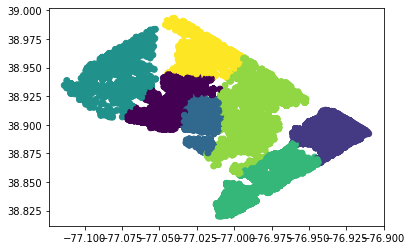

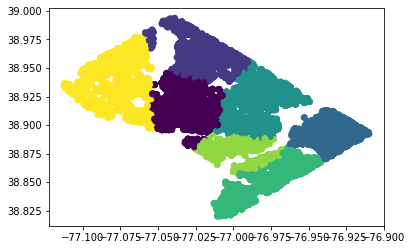

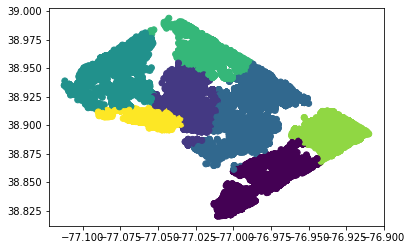

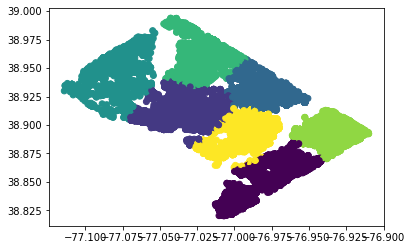

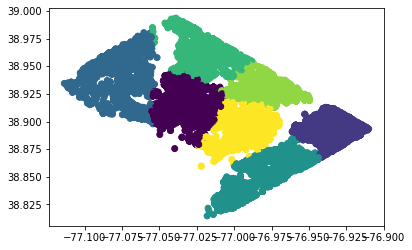

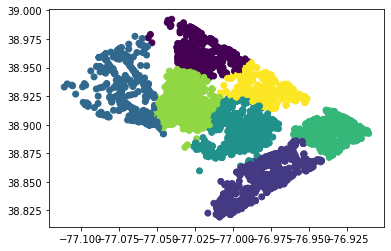

In [38]:
from sklearn.mixture import GaussianMixture


gmm_08 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_08)
y_pred = gmm_08.predict(crime_train_08)
x = crime_train_08.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_09 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_09)
y_pred = gmm_09.predict(crime_train_09)
x = crime_train_09.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_10 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_10)
y_pred = gmm_10.predict(crime_train_10)
x = crime_train_10.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_11 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_11)
y_pred = gmm_11.predict(crime_train_11)
x = crime_train_11.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_12 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_12)
y_pred = gmm_12.predict(crime_train_12)
x = crime_train_12.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_13 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_13)
y_pred = gmm_13.predict(crime_train_13)
x = crime_train_13.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_14 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_14)
y_pred = gmm_14.predict(crime_train_14)
x = crime_train_14.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_15 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_15)
y_pred = gmm_15.predict(crime_train_15)
x = crime_train_15.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_16 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_16)
y_pred = gmm_16.predict(crime_train_16)
x = crime_train_16.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_17 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_17)
y_pred = gmm_17.predict(crime_train_17)
x = crime_train_17.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_18 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_18)
y_pred = gmm_18.predict(crime_train_18)
x = crime_train_18.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_19 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_19)
y_pred = gmm_19.predict(crime_train_19)
x = crime_train_19.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_20 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_20)
y_pred = gmm_20.predict(crime_train_20)
x = crime_train_20.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

gmm_21 = GaussianMixture(n_components=7, covariance_type='full').fit(crime_train_21)
y_pred = gmm_21.predict(crime_train_21)
x = crime_train_21.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

Conclusion:<p>Gaussian Mixture can divide city into 7 distinct area, while each year is divided differently

In [39]:
properties_new["YEAR"]=properties_new["YR_RMDL_OUTLIER"].astype(int)
properties_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BATHRM            57900 non-null  int64  
 1   HF_BATHRM         57900 non-null  int64  
 2   BEDRM             57900 non-null  int64  
 3   EYB               57900 non-null  int64  
 4   SALE_NUM          57900 non-null  int64  
 5   LANDAREA          57900 non-null  int64  
 6   LATITUDE          57900 non-null  float64
 7   LONGITUDE         57900 non-null  float64
 8   CENSUS_TRACT      57900 non-null  float64
 9   X                 57900 non-null  float64
 10  Y                 57900 non-null  float64
 11  PRICE_OUTLIER     57900 non-null  float64
 12  GBA_OUTLIER       57900 non-null  float64
 13  LANDAREA_OUTLIER  57900 non-null  float64
 14  ZIPCODE_OUTLIER   57900 non-null  float64
 15  ROOMS_OUTLIER     57900 non-null  float64
 16  YR_RMDL_OUTLIER   57900 non-null  float

using Gaussian Mixture model to find which area the house belongs to

For the ammount of crime is so large, we choose 20% of data as the traing set.
then we divide the traing set in different years from 2008 to 2021<p>find the crimes that occured on the year that a house was sold which has the distance less than 0.0004

In [40]:
p=pd.DataFrame()
def predict_crime(x,y,z) :
    p["LONGITUDE"]=[y]
    p["LATITUDE"]=[z]
    if x>=2020: return gmm_20.predict(p)
    elif x>=2019: return gmm_19.predict(p)
    elif x>=2018: return gmm_18.predict(p)
    elif x>=2017: return gmm_17.predict(p)
    elif x>=2016: return gmm_16.predict(p)
    elif x>=2015: return gmm_15.predict(p)
    elif x>=2014: return gmm_14.predict(p)
    elif x>=2013: return gmm_13.predict(p)
    elif x>=2012: return gmm_12.predict(p)
    elif x>=2011: return gmm_11.predict(p)
    elif x>=2010: return gmm_10.predict(p)
    elif x>=2009: return gmm_09.predict(p)
    elif x>=2008: return gmm_08.predict(p)
    else: return gmm_08.predict(p)
    
properties_new["CRIME"] = properties_new.apply(lambda a:predict_crime(a.YEAR, a.LONGITUDE, a.LATITUDE),axis=1)

properties_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BATHRM            57900 non-null  int64  
 1   HF_BATHRM         57900 non-null  int64  
 2   BEDRM             57900 non-null  int64  
 3   EYB               57900 non-null  int64  
 4   SALE_NUM          57900 non-null  int64  
 5   LANDAREA          57900 non-null  int64  
 6   LATITUDE          57900 non-null  float64
 7   LONGITUDE         57900 non-null  float64
 8   CENSUS_TRACT      57900 non-null  float64
 9   X                 57900 non-null  float64
 10  Y                 57900 non-null  float64
 11  PRICE_OUTLIER     57900 non-null  float64
 12  GBA_OUTLIER       57900 non-null  float64
 13  LANDAREA_OUTLIER  57900 non-null  float64
 14  ZIPCODE_OUTLIER   57900 non-null  float64
 15  ROOMS_OUTLIER     57900 non-null  float64
 16  YR_RMDL_OUTLIER   57900 non-null  float

In [41]:
properties_new["CRIME"].describe()

count     57900
unique        7
top         [2]
freq      14239
Name: CRIME, dtype: object

In [ ]:
properties_combine_crime=properties_new[properties_new['YEAR']>2007]

from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(crime_filtered,crime_filtered["OFFENSE"],test_size=0.8,random_state=1234)

train_filtered_08=x_train[x_train.YEAR==2008]
train_filtered_09=x_train[x_train.YEAR==2009]
train_filtered_10=x_train[x_train.YEAR==2010]
train_filtered_11=x_train[x_train.YEAR==2011]
train_filtered_12=x_train[x_train.YEAR==2012]
train_filtered_13=x_train[x_train.YEAR==2013]
train_filtered_14=x_train[x_train.YEAR==2014]
train_filtered_15=x_train[x_train.YEAR==2015]
train_filtered_16=x_train[x_train.YEAR==2016]
train_filtered_17=x_train[x_train.YEAR==2017]
train_filtered_18=x_train[x_train.YEAR==2018]
train_filtered_19=x_train[x_train.YEAR==2019]
train_filtered_20=x_train[x_train.YEAR==2020]
train_filtered_21=x_train[x_train.YEAR==2021]

idx=properties_combine_crime.index


properties_combine_crime['CRIME_NUM']=0
for i in idx:
    count=0
    x=properties_combine_crime.loc[i,'LONGITUDE']
    y=properties_combine_crime.loc[i,'LATITUDE']
    
    if properties_combine_crime.loc[i,'YEAR']==2008:
        for j in train_filtered_08.index:
            if (((train_filtered_08.loc[j,'LONGITUDE']-x)**2)+((train_filtered_08.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2009:
        for j in train_filtered_09.index:
            if (((train_filtered_09.loc[j,'LONGITUDE']-x)**2)+((train_filtered_09.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2010:
        for j in train_filtered_10.index:
            if (((train_filtered_10.loc[j,'LONGITUDE']-x)**2)+((train_filtered_10.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2011:
        for j in train_filtered_11.index:
            if (((train_filtered_11.loc[j,'LONGITUDE']-x)**2)+((train_filtered_11.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2012:
        for j in train_filtered_12.index:
            if (((train_filtered_12.loc[j,'LONGITUDE']-x)**2)+((train_filtered_12.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2013:
        for j in train_filtered_13.index:
            if (((train_filtered_13.loc[j,'LONGITUDE']-x)**2)+((train_filtered_13.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2014:
        for j in train_filtered_14.index:
            if (((train_filtered_14.loc[j,'LONGITUDE']-x)**2)+((train_filtered_14.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2015:
        for j in train_filtered_15.index:
            if (((train_filtered_15.loc[j,'LONGITUDE']-x)**2)+((train_filtered_15.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2016:
        for j in train_filtered_16.index:
            if (((train_filtered_16.loc[j,'LONGITUDE']-x)**2)+((train_filtered_16.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2017:
        for j in train_filtered_17.index:
            if (((train_filtered_17.loc[j,'LONGITUDE']-x)**2)+((train_filtered_17.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2018:
        for j in train_filtered_18.index:
            if (((train_filtered_18.loc[j,'LONGITUDE']-x)**2)+((train_filtered_18.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2019:
        for j in train_filtered_19.index:
            if (((train_filtered_19.loc[j,'LONGITUDE']-x)**2)+((train_filtered_19.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2020:
        for j in train_filtered_20.index:
            if (((train_filtered_20.loc[j,'LONGITUDE']-x)**2)+((train_filtered_20.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
    elif properties_combine_crime.loc[i,'YEAR']==2021:
        for j in train_filtered_21.index:
            if (((train_filtered_21.loc[j,'LONGITUDE']-x)**2)+((train_filtered_21.loc[j,'LATITUDE']-y)**2))<0.00004:
                count=count+1
                
    properties_combine_crime.loc[i,'CRIME_NUM']=count
#     print(i,count,properties_combine_crime.loc[i,'CRIME_NUM'])

properties_combine_crime.info()

display the correlation matrix

In [ ]:
corrmatrix=properties_combine_crime.corr()
corrmatrix

create the quadratic, cube, and biquardrate number of CRIME_NUM<p>show the crrelation between those values and price

In [ ]:
properties_combine_crime["CRIME_NUM_2"]=properties_combine_crime["CRIME_NUM"]*properties_combine_crime["CRIME_NUM"]
properties_combine_crime["CRIME_NUM_3"]=properties_combine_crime["CRIME_NUM_2"]*properties_combine_crime["CRIME_NUM"]
properties_combine_crime["CRIME_NUM_4"]=properties_combine_crime["CRIME_NUM_2"]*properties_combine_crime["CRIME_NUM_2"]
corrmatrix=properties_combine_crime.corr()
corrmatrix["PRICE_OUTLIER"].sort_values()

we can see that the cube number has the greatest correlation, so we keep the cube number and drop others

In [ ]:
properties_combine_crime.drop(["CRIME_NUM"],axis=1,inplace=True)
properties_combine_crime.drop(["CRIME_NUM_2"],axis=1,inplace=True)
properties_combine_crime.drop(["CRIME_NUM_4"],axis=1,inplace=True)
properties_combine_crime.drop(["CRIME"],axis=1,inplace=True)
properties_combine_crime.info()

using linear regression model and lasso regression model

In [ ]:
from sklearn import linear_model
from sklearn import model_selection

x_train,x_test,y_train,y_test=model_selection.train_test_split(properties_combine_crime,properties_combine_crime["PRICE_OUTLIER"],test_size=0.2,random_state=1234)

x_train.drop(["PRICE_OUTLIER"],axis=1, inplace=True)
x_test.drop(["PRICE_OUTLIER"],axis=1, inplace=True)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print(regr.intercept_)
print(regr.coef_)
print(regr.score(x_test, y_test))

In [ ]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error

Lambdas=np.logspace(-5,2,200)

Lambdas=np.logspace(-5,2,200)
lasso_cv=LassoCV(alphas=Lambdas,normalize=True,cv=10,max_iter=10000)
lasso_cv.fit(x_train,y_train)

lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
lasso.fit(x_train,y_train)
print(pd.Series(index=['Intercept']+x_train.columns.tolist(),data=[lasso.intercept_]+lasso.coef_.tolist()))
lasso_score=lasso.score(x_test, y_test)
lasso_score

Conclusion:<p>the cube of crime num occured nearby has a positive attribute to the price.